In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path="./Data/Canada.csv"

In [3]:
canada_df=pd.read_csv(path)

In [4]:
del canada_df['Unnamed: 0']

In [5]:
canada_df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
canada_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [7]:
canada_df=canada_df.drop(columns=['AREA','REG','DEV'])

In [8]:
canada_df=canada_df.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'})

In [9]:
canada_df.head()

,Type,Coverage,Country,Continent,Region,DevName,1980,1981,1982,1983,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [10]:
canada_df['Total_mygration']=canada_df.sum(axis=1,numeric_only=True)
canada_df.head()

,Type,Coverage,Country,Continent,Region,DevName,1980,1981,1982,1983,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_mygration
0,Immigrants,Foreigners,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Immigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Immigrants,Foreigners,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Immigrants,Foreigners,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Immigrants,Foreigners,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [11]:
df=canada_df.groupby(canada_df['Country']).mean(['Total_mygration'])

In [12]:
sorted_df=df.sort_values(by='Total_mygration',ascending=False)

In [13]:
top_10_countries=sorted_df.head(10)

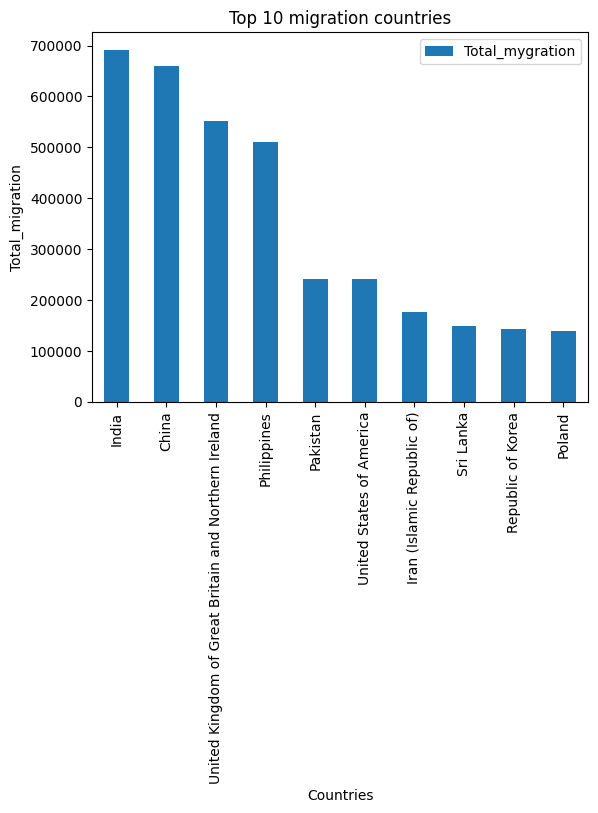

In [14]:
top_10_countries.plot(kind='bar',
                      y='Total_mygration',
                      rot=90)
plt.xlabel('Countries')
plt.ylabel('Total_migration')
plt.title('Top 10 migration countries')
plt.show()

In [15]:
india_df=canada_df.loc[canada_df['Country']=='India']

In [16]:
indian_df=india_df.iloc[:,6:40]

In [17]:
indian_df=indian_df.T.rename(columns={79:'Total_Migration'})

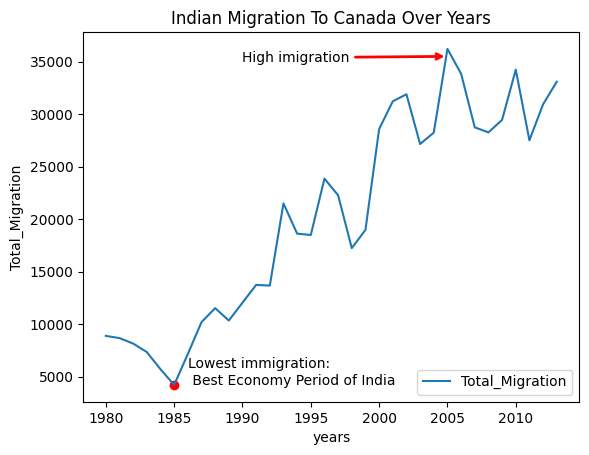

In [74]:
indian_df.plot(kind='line')
plt.xlabel('years')
plt.ylabel('Total_Migration')
plt.title('Indian Migration To Canada Over Years')
plt.scatter(5, 4250, color='red', marker='o')
plt.text(6,4270,'Lowest immigration:\n Best Economy Period of India')
plt.annotate(
    'High imigration',
    xy=(25,35500),
    xytext=(10,35000),
    xycoords='data',
    arrowprops=dict(arrowstyle='->',color='red',connectionstyle='arc',lw=2)
)
               

plt.show()

In [19]:
bottom_10_countries=sorted_df.tail(10)

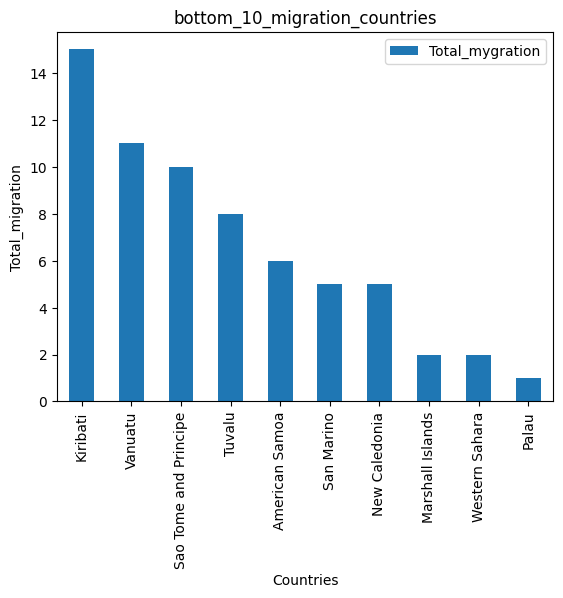

In [20]:
bottom_10_countries.plot(kind='bar',
                      y='Total_mygration',
                      rot=90)
plt.xlabel('Countries')
plt.ylabel('Total_migration')
plt.title('bottom_10_migration_countries')
plt.show()

In [21]:
Kiribati_df=canada_df.loc[canada_df['Country']=='Kiribati']

In [22]:
Kiribati_df=Kiribati_df.iloc[:,6:40]

<Axes: title={'center': 'Kiribati Migration To Canada Over Years'}, xlabel='Years', ylabel='Total_Migration'>

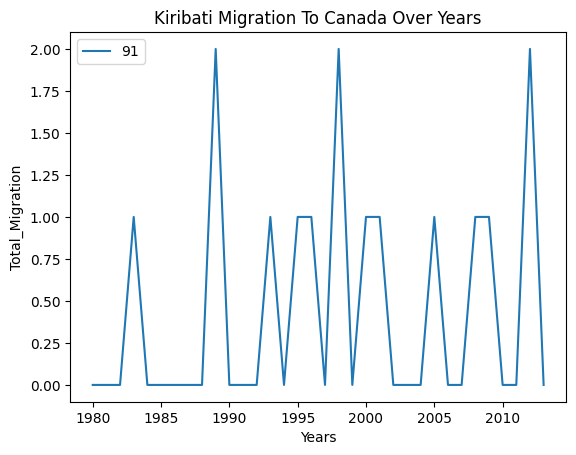

In [23]:
Kiribati_df=Kiribati_df.T.rename(columns={79:'Total_Migration'})
Kiribati_df.plot(kind='line',
               xlabel='Years',
               ylabel='Total_Migration',
               title='Kiribati Migration To Canada Over Years')


In [24]:
imigration_df=canada_df.iloc[:,6:40]
imigration_per_year=imigration_df.sum(axis=0)

percent_imigration=(imigration_per_year/(imigration_per_year.sum()))*100


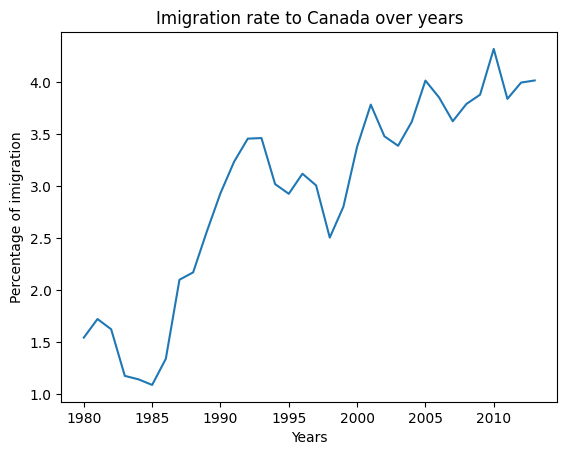

In [25]:

percent_imigration.plot()
plt.xlabel('Years')
plt.ylabel('Percentage of imigration')
plt.title('Imigration rate to Canada over years')
plt.show()

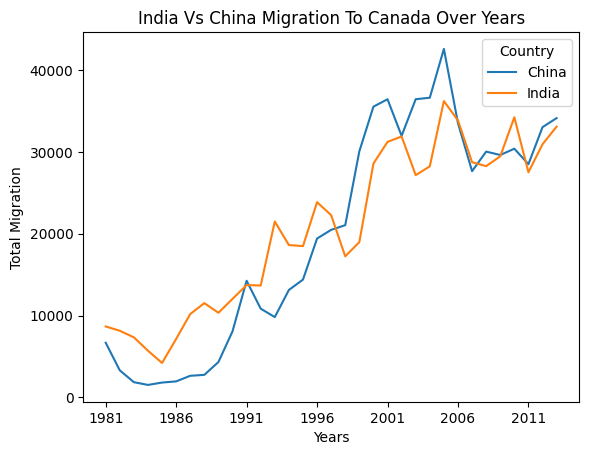

In [26]:
df_1=canada_df.set_index('Country')
Indo_chi_df=df_1.iloc[:,6:39][(df_1.index=='India')| (df_1.index=='China')]
Indo_chi_df.T.plot()
plt.xlabel('Years')
plt.ylabel('Total Migration')
plt.title('India Vs China Migration To Canada Over Years')
plt.show()

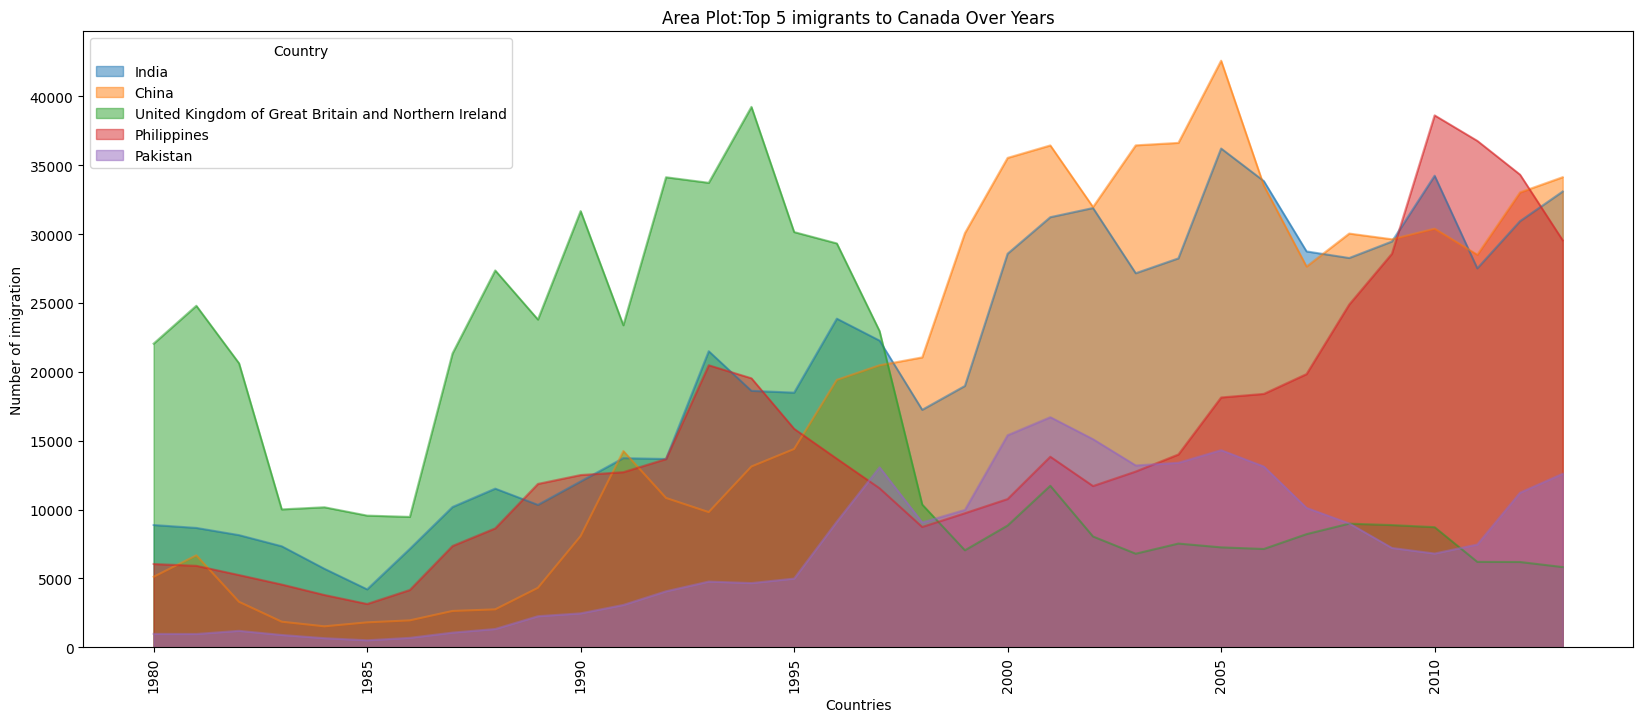

In [46]:
area_top=top_10_countries.head(5)
del area_top['Total_mygration']
area_top=area_top.T
area_top.plot(kind='area',
              stacked=False,
              alpha=0.5,
              rot=90,
              figsize=(20,8))
plt.xlabel("Countries")
plt.ylabel('Number of imigration')
plt.title('Area Plot:Top 5 imigrants to Canada Over Years')
plt.show()

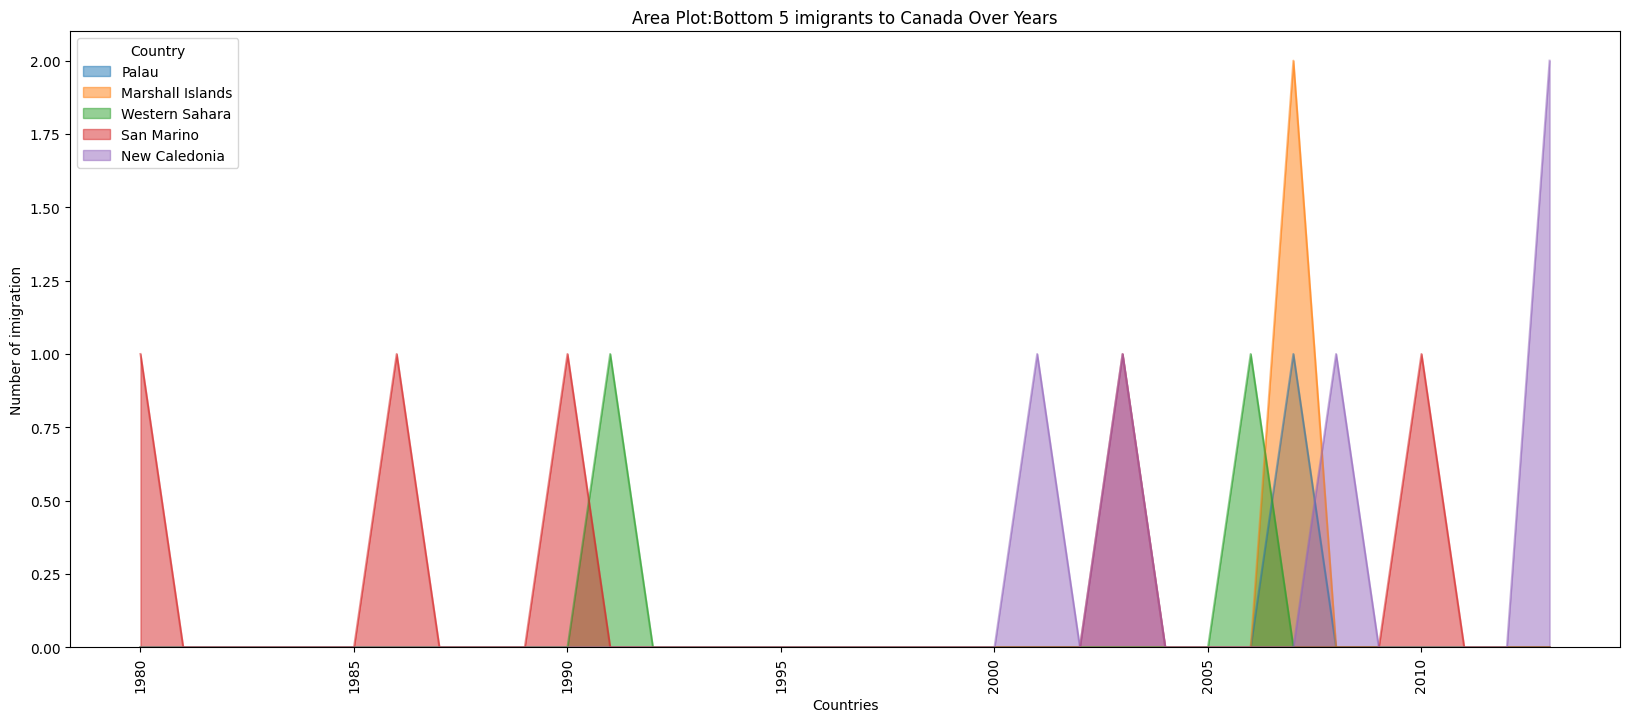

In [52]:
sorted_bottom_10_countries=bottom_10_countries.sort_values(by='Total_mygration')
area_bottom=sorted_bottom_10_countries.head(5)
del area_bottom['Total_mygration']
area_bottom=area_bottom.T
area_bottom.plot(kind='area',
              stacked=False,
              alpha=0.5,
              rot=90,
              figsize=(20,8))
plt.xlabel("Countries")
plt.ylabel('Number of imigration')
plt.title('Area Plot:Bottom 5 imigrants to Canada Over Years')
plt.show()

<Axes: ylabel='Frequency'>

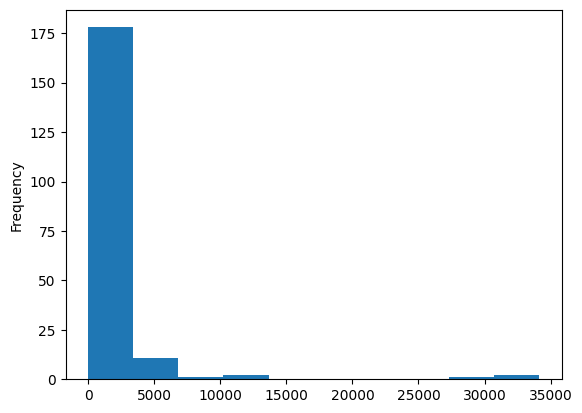

In [78]:
new_df=canada_df.set_index('Country')
df_2013=new_df['2013']
df_2013.plot(kind='hist')

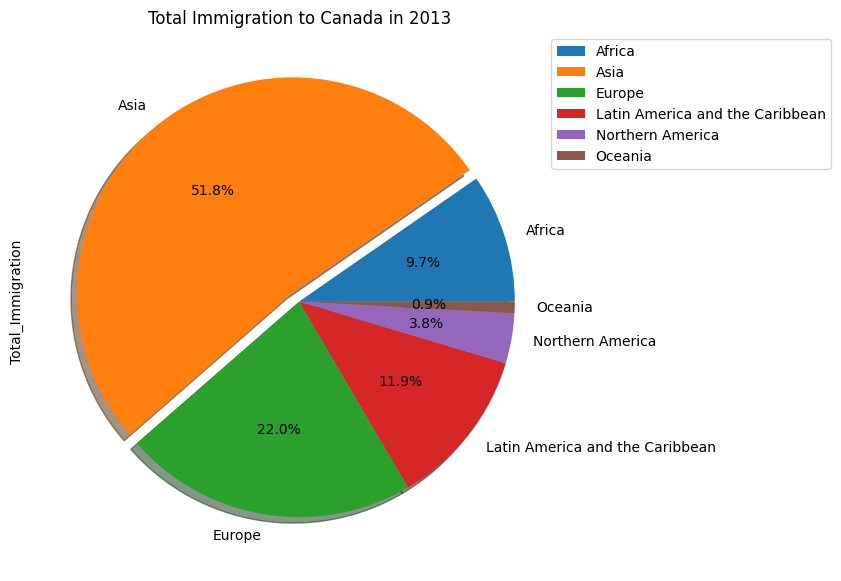

In [109]:
continent_df=canada_df.groupby('Continent').sum('Total_mygration')
continent_df.plot(kind='pie',
                  y='Total_mygration',
                  figsize=(15,7),
                  autopct='%1.1f%%',
                  explode=[0,0.05,0,0,0,0],
                  shadow=True
                  )
plt.legend(loc='upper right',bbox_to_anchor=(1.5, 1))
plt.ylabel('Total_Immigration')
plt.title('Total Immigration to Canada in 2013')
plt.show()

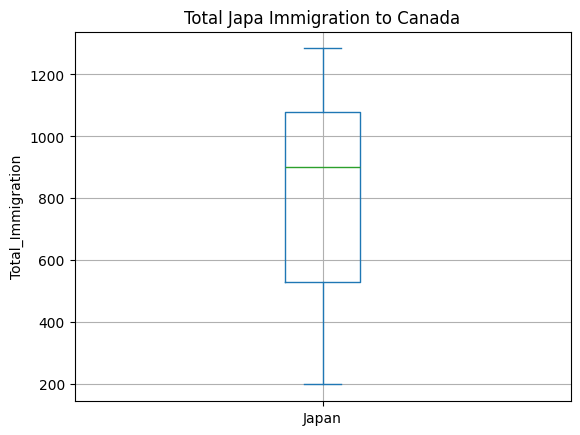

In [141]:
japan_df=new_df.loc['Japan', '1980':'2013']

japan_df.plot(kind='box',
              grid=True)
plt.ylabel('Total_Immigration')
plt.title('Total Japa Immigration to Canada')
plt.show()


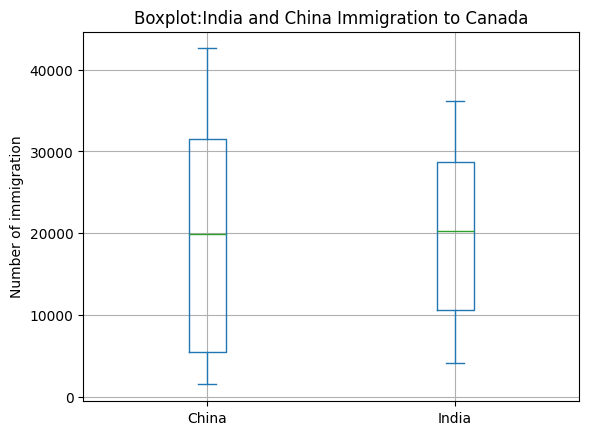

In [142]:
CI_df=new_df.loc[(new_df.index=='India') | (new_df.index=='China'),'1980':'2013'].T
CI_df.plot(kind='box',
           grid=True)
plt.ylabel('Number of immigration')
plt.title('Boxplot:India and China Immigration to Canada')
plt.show()

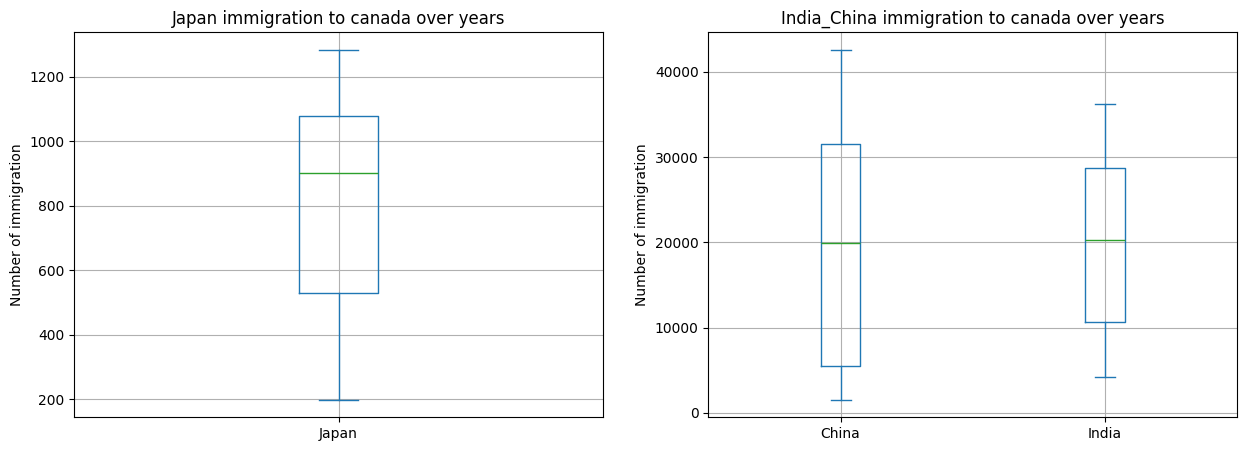

In [147]:
fig=plt.figure(figsize=(15,5))

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

japan_df.plot(kind='box',
              grid=True,
              ax=ax0)
ax0.set_ylabel('Number of immigration')
ax0.set_title('Japan immigration to canada over years')

CI_df.plot(kind='box',
           grid=True,
           ax=ax1)
ax1.set_ylabel('Number of immigration')
ax1.set_title('India_China immigration to canada over years')
plt.show()




In [161]:
top_20_countries=sorted_df.head(20)
top_df_80s=top_20_countries.loc[:,'1980':'1989'].sum(axis=1)
top_df_90s=top_20_countries.loc[:,'1990':'1999'].sum(axis=1)
top_df_00s=top_20_countries.loc[:,'2000':'2013'].sum(axis=1)

In [162]:
year_df=pd.DataFrame({'1980s':top_df_80s,'1990s':top_df_90s,'2000s':top_df_00s})
year_df

,1980s,1990s,2000s
Country,,,
India,82154.0,180395.0,429355.0
China,32003.0,161528.0,466431.0
United Kingdom of Great Britain and Northern Ireland,179171.0,261966.0,110363.0
Philippines,60764.0,138482.0,312145.0
Pakistan,10591.0,65302.0,165707.0
United States of America,76824.0,56915.0,107383.0
Iran (Islamic Republic of),21477.0,54871.0,99575.0
Sri Lanka,14796.0,70421.0,63141.0
Republic of Korea,16259.0,38189.0,88133.0


<Axes: >

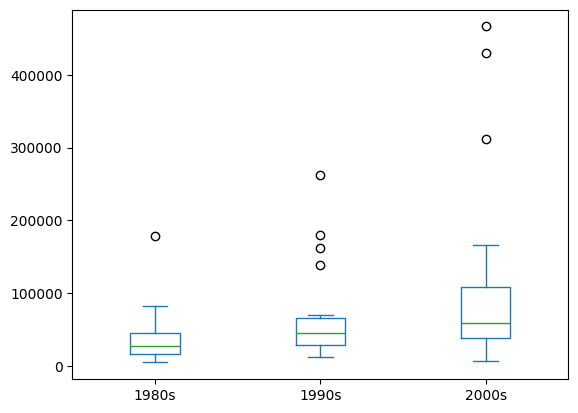

In [163]:
year_df.plot(kind='box')

In [164]:
year_df.describe()

,1980s,1990s,2000s
count,20.000000,20.000000,20.000000
mean,38684.850000,69576.450000,111987.250000
std,39905.924507,65189.922079,133545.533453
min,4792.000000,11695.000000,6831.000000
25%,15893.250000,29336.000000,38361.250000
50%,27778.000000,44787.000000,58853.000000
75%,44724.500000,66581.750000,108128.000000
max,179171.000000,261966.000000,466431.000000


In [167]:
# 1980s outliters
Q1=15893.250000
Q3=44724.500000
threshold=Q3+1.5*(Q3-Q1)
year_df[year_df['1980s']>threshold]


,1980s,1990s,2000s
Country,,,
United Kingdom of Great Britain and Northern Ireland,179171.0,261966.0,110363.0


In [168]:
# 1990s outliters
Q1=29336.000000
Q3=66581.750000
threshold=Q3+1.5*(Q3-Q1)
year_df[year_df['1990s']>threshold]


,1980s,1990s,2000s
Country,,,
India,82154.0,180395.0,429355.0
China,32003.0,161528.0,466431.0
United Kingdom of Great Britain and Northern Ireland,179171.0,261966.0,110363.0
Philippines,60764.0,138482.0,312145.0


In [169]:
# 2000s outliters
Q1=38361.250000
Q3=108128.000000
threshold=Q3+1.5*(Q3-Q1)
year_df[year_df['2000s']>threshold]

,1980s,1990s,2000s
Country,,,
India,82154.0,180395.0,429355.0
China,32003.0,161528.0,466431.0
Philippines,60764.0,138482.0,312145.0


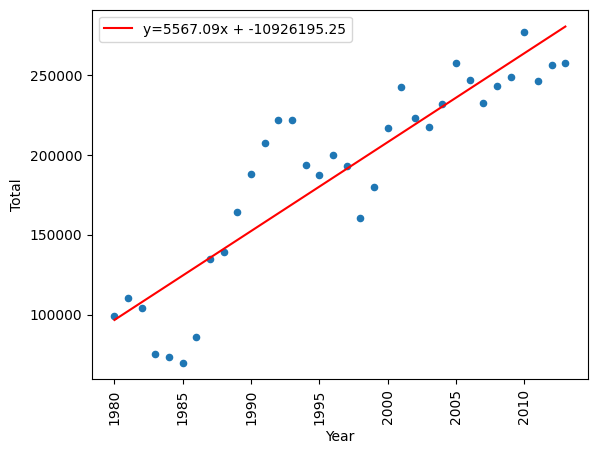

In [229]:
year_total_df=canada_df.iloc[:,6:40].sum(axis=0)
year_total_df=pd.DataFrame(year_total_df)
year_total_df=year_total_df.reset_index().rename(columns={'index':'Year',0:'Total'})
year_total_df['Year'] = pd.to_numeric(year_total_df['Year'])
year_total_df['Total'] = pd.to_numeric(year_total_df['Total'])
ax=year_total_df.plot(kind='scatter',
                   x='Year',
                   y='Total',
                   rot=90)
x = year_total_df['Year']
y = year_total_df['Total']
# Perform linear regression
fit = np.polyfit(x, y, 1)
plt.plot(x,fit[0]*x + fit[1],color='red',label=f'y={fit[0]:.2f}x + {fit[1]:.2f}')
plt.legend()
plt.show()



Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement word (from versions: none)
ERROR: No matching distribution found for word
